In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
with open("data/eigen.pkl", "rb") as f:
    X = pickle.load(f)

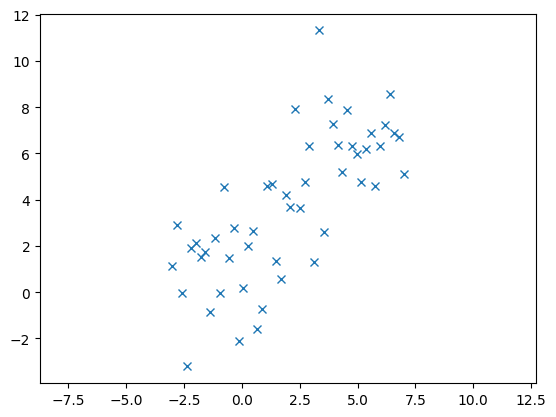

In [4]:
plt.plot(X[:, 0], X[:, 1], "x")
plt.axis("equal")
plt.show()

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=1).fit(X)

X_pca = pca.transform(X)

In [7]:
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

In [8]:
X[:10]

array([[-3.        ,  1.1474225 ],
       [-2.79591837,  2.91847142],
       [-2.59183673, -0.05209246],
       [-2.3877551 , -3.2127219 ],
       [-2.18367347,  1.91180977],
       [-1.97959184,  2.14358145],
       [-1.7755102 ,  1.53225988],
       [-1.57142857,  1.75427292],
       [-1.36734694, -0.86299657],
       [-1.16326531,  2.33830441]])

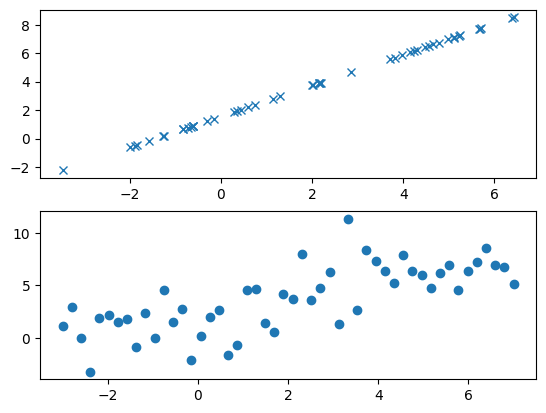

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:, 0], X_new[:, 1], "x")

plt.subplot(212)
plt.plot(X[:, 0], X[:, 1], "o")
plt.show()

## PCA analytic

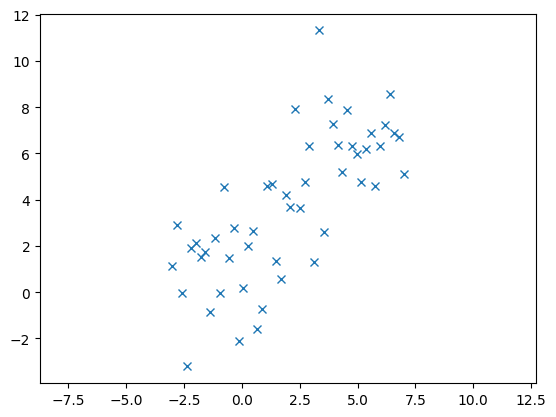

In [13]:
plt.plot(X[:, 0], X[:, 1], "x")
plt.axis("equal")
plt.show()


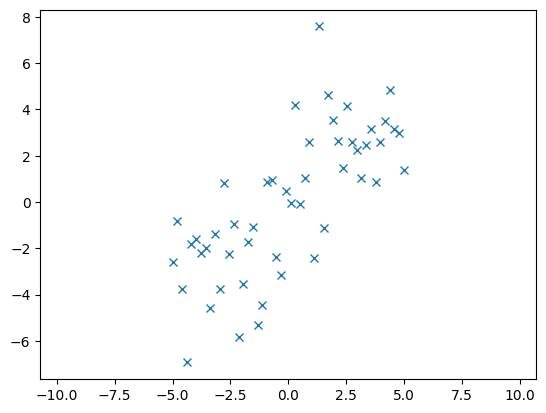

In [19]:
mean_val = X.mean(axis=0)
N = X.shape[0]
# center dataset
X_centered = X.copy() - mean_val

plt.plot(X_centered[:, 0], X_centered[:, 1], "x")
plt.axis("equal")
plt.show()

In [21]:
X_cov = X_centered.T.dot(X_centered) / (N-1)
X_cov

array([[8.85047897, 6.81117445],
       [6.81117445, 9.95969352]])

In [23]:
np.cov(X_centered, rowvar=0)

array([[8.85047897, 6.81117445],
       [6.81117445, 9.95969352]])

In [24]:
from numpy import linalg

In [27]:
eigen_values, eigen_vectors = linalg.eig(X_cov)

print("\n".join([f"lambda: {eigen_values[i]},\tw: {eigen_vectors[i]}" for i in range(eigen_values.size)]))

lambda: 2.57136935073713,	w: [-0.7352406  -0.67780621]
lambda: 16.238803136510406,	w: [ 0.67780621 -0.7352406 ]


In [40]:
print(eigen_vectors)

[[-0.7352406  -0.67780621]
 [ 0.67780621 -0.7352406 ]]


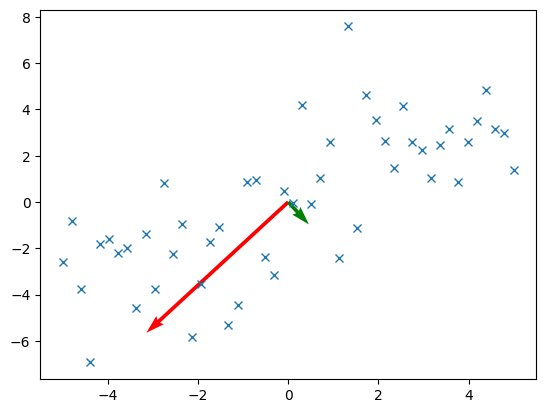

In [67]:
origin = X_centered.mean(axis=0) #center coordinates

plt.quiver(*origin, *eigen_vectors[0], color=["r"], scale=eigen_values[0])
plt.quiver(*origin, *eigen_vectors[1], color=["g"], scale=eigen_values[1])
plt.plot(X_centered[:, 0], X_centered[:, 1], "x")
plt.show()

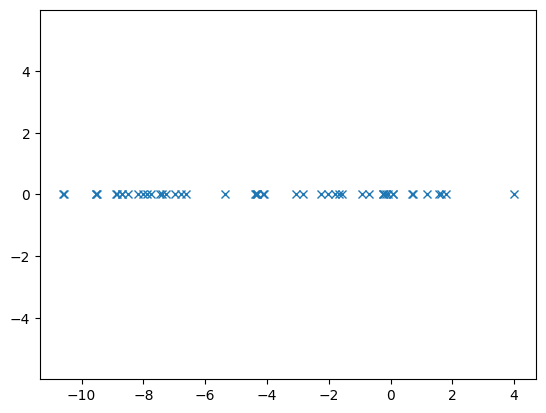

In [68]:
max_eigen_val = np.argmax(eigen_values)
max_eigen_vec = eigen_vectors[:, max_eigen_val].reshape(-1, 1)

X_redused = X.dot(max_eigen_vec)
plt.plot(X_redused[:, 0], np.zeros(N), "x")
plt.axis("equal")
plt.show()

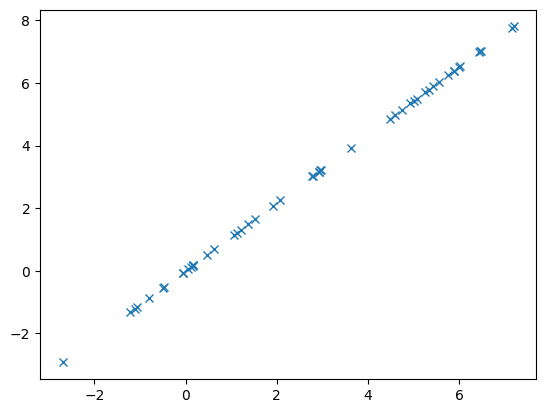

In [71]:
X_inverse = X_redused.dot(max_eigen_vec.reshape(1,-1))

plt.plot(X_inverse[:, 0], X_inverse[:, 1], "x")
plt.show()